In [30]:
#Aaron Coe
from scipy.integrate import odeint
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [31]:
#stellar abundance wikipedia
X = .705
Y = .275
Z = .02

XH = .64
Xcno = .015

#gaunt factors and guillotine factor
gbf = 1.0
gff = 1.3
guillotine = 10.0

i = 10000 #steps

# r = 0
Mr0 = 0.0
Lr0 = 0.0
T0 = 1.57e7
P0 = 2.3e16 
y0 = [Mr0, Lr0, T0, P0]

In [32]:
#def dM_dr(rho, r):
 #   return rho * 4 * np.pi * r ** 2

#def dT_dr(rho, L, r, T)

In [33]:
#constants
mh = 1.6727e-27 #Kg Hydrogen mass
Kb = 1.381e-23  #Boltzman m^2 Kg s^-2 K^-1
G = 6.67408e-11 #m^3 kg^-1 s^-2
r_sun = 6.957e8 #m
m_sun = 2.0e30  #kg
L_sun = 3.846e26 #W
a = 7.6565e-16 #J m^-3 K^-4
c = 2.998e8  #m/s
e0pp = 1.08e-12 #W m^-3 K^-2
e0cno = 8.24e-31 

u = 1.0/((2.0*X)+((3.0/4.0)*Y)+((1.0/2.0)*Z))

def rho(y):
    Mr, Lr, T, P = y
    return (P-(a*np.power(T, 4.0)/3.0))*((u*mh)/(Kb*T))

def epsilon(y):
    Mr, Lr, T, P = y
    rho0 = rho(y)
    epp = e0pp*rho0*np.power(XH, 2.0)*np.power((T/1e6), 4.0)
    ecno = e0cno*rho0*XH*Xcno*np.power((T/1e6), 19.9)
    return epp + ecno

def kappa(y):
    Mr, Lr, T, P = y
    rho0 = rho(y)
    kbf = 4.3e21*(gbf/guillotine)*Z*(1.0+X)*(rho0/np.power(T, 3.5))
    kff = 3.7e18*gff*(1.0-Z)*(1.0+X)*(rho0/np.power(T, 3.5))
    ke = 0.02*(1.0+X)
    return ((kbf+kff+ke)/3.0)

#def rho(y):





u

0.6149116064565718

In [34]:
def dL_dr(y, r):
    Mr, Lr, T, P = y
    rho0 = rho(y)
    epsilon0 = epsilon(y)
    return 4.0*np.pi*np.power(r, 2.0)*rho0*epsilon0

In [35]:
def dT_dr(y, r):
    Mr, Lr, T, P = y
    rho0 = rho(y)
    kappa0 = kappa(y)
    return -(3.0/(4.0*a*c))*(kappa0*rho0/np.power(T, 3.0))*(Lr/(4.0*np.pi*np.power(r, 2.0)))

In [36]:
def dM_dr(y, r):
    Mr, Lr, T, P = y
    rho0 = rho(y)
    return 4.0*np.pi*np.power(r, 2.0)*rho0

In [37]:
def dP_dr(y, r):
    Mr, Lr, T, P = y
    rho0 = rho(y)
    return -G*Mr*rho0/np.power(r, 2.0)

In [38]:
def diff_sys(y, r):
    Mr, Lr, T, P = y
    diff_sys1 = [dM_dr(y, r), dL_dr(y, r), dT_dr(y, r), dP_dr(y, r)]
    return diff_sys1

In [39]:
rs = np.linspace(.03, r_sun, i)

ys = odeint(diff_sys, y0, rs)

In [40]:
rhos = np.array([[rho(ys[y])] for y in range(i)]).flatten()
#rhos
#rs/r_sun
#[rho(ys[y])]

dL_drs = np.array([[dL_dr(ys[y], np.array(rs)[y])] for y in range(i)])

In [41]:
#ys[:,3]

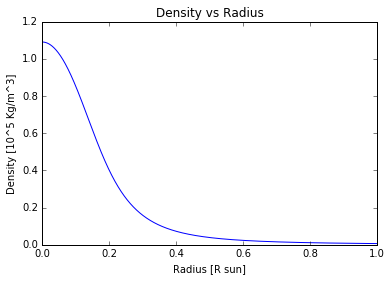

In [42]:
plt.plot(rs/r_sun, rhos/1e5)
plt.title("Density vs Radius")
plt.xlabel("Radius [R sun]")
plt.ylabel("Density [10^5 Kg/m^3]");

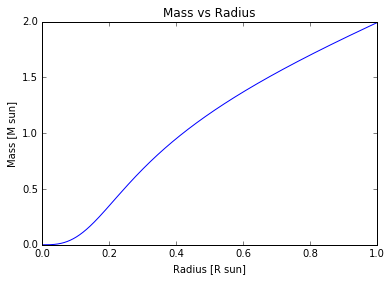

In [43]:
plt.plot(rs/r_sun, ys[:, 0]/m_sun)
plt.title("Mass vs Radius")
plt.xlabel("Radius [R sun]")
plt.ylabel("Mass [M sun]");

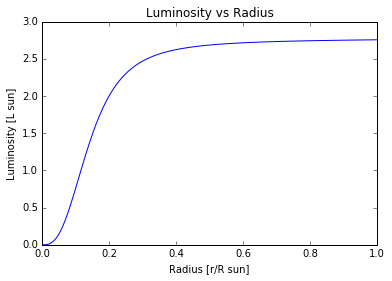

In [44]:
plt.plot(rs/r_sun, ys[:,1]/L_sun)
plt.xlabel("Radius [r/R sun]")
plt.ylabel("Luminosity [L sun]")
plt.title("Luminosity vs Radius");

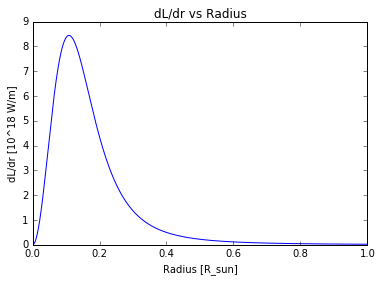

In [45]:
plt.plot(rs/r_sun, dL_drs/1e18)
plt.title("dL/dr vs Radius")
plt.xlabel("Radius [R_sun]")
plt.ylabel("dL/dr [10^18 W/m]");

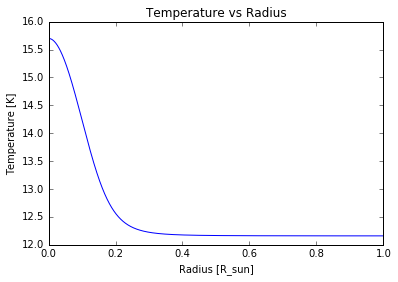

In [46]:
plt.plot(rs/r_sun, ys[:, 2]/1e6);
plt.xlabel("Radius [R_sun]")
plt.ylabel("Temperature [K]")
plt.title("Temperature vs Radius");

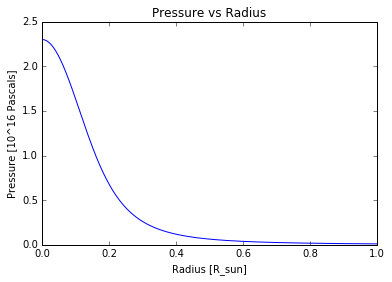

In [47]:
plt.plot(rs/r_sun, ys[:, 3]/1e16);
plt.title("Pressure vs Radius")
plt.xlabel("Radius [R_sun]")
plt.ylabel("Pressure [10^16 Pascals]");